<a href="https://colab.research.google.com/github/djs21905/Machine-Learning/blob/master/SmithAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/51576272/why-does-performance-suffer-when-fitting-a-random-forest-model-after-reducing-wi


# Ingest






In [0]:
import pandas as pd

test = pd.read_csv("https://msds422smith.s3.amazonaws.com/test.csv")
train = pd.read_csv("https://msds422smith.s3.amazonaws.com/train.csv")

In [0]:
(train.shape, test.shape)

((42000, 785), (28000, 784))

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA

In [0]:
# Evenly distributed 
train["label"].value_counts().sort_values(ascending=False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = train.iloc[:,1:]
y = train.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42 , stratify = y , test_size = 0.2)


(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

scalar = StandardScaler()
scalar.fit(x_train)

scaled_x_train = scalar.transform(x_train)
scaled_x_test = scalar.transform(x_test)



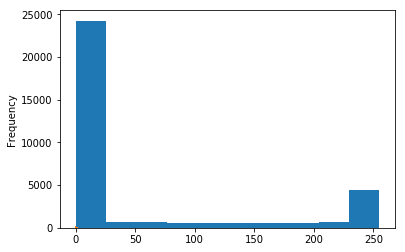

In [0]:
import matplotlib.pyplot as plt

x_train.iloc[:,273].plot(kind ="hist")
a = pd.DataFrame(scaled_x_test)
a.iloc[:,273].plot(kind="hist")

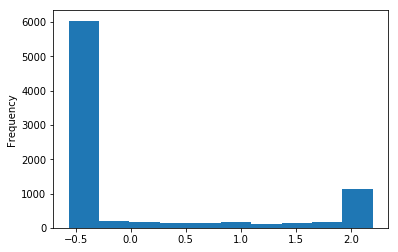

In [0]:
a.iloc[:,273].plot(kind="hist")

In [0]:
y_test.value_counts() / (y_train.value_counts() + y_test.value_counts()), y_train.value_counts() / (y_train.value_counts() + y_test.value_counts())

(1    0.200043
 7    0.199955
 3    0.199954
 9    0.200096
 2    0.199904
 6    0.200145
 0    0.199903
 4    0.199902
 8    0.200098
 5    0.200000
 Name: label, dtype: float64, 1    0.799957
 7    0.800045
 3    0.800046
 9    0.799904
 2    0.800096
 6    0.799855
 0    0.800097
 4    0.800098
 8    0.799902
 5    0.800000
 Name: label, dtype: float64)

## Random Forest 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier()

max_depth = np.arange(1,100,1)
min_samples_leaf = np.arange(1,100,1)
min_samples_split = np.arange(2,1000,1)
n_estimators = [10]

param_dist = {
    'bootstrap': [True],
    'max_depth': max_depth,
    'max_features': ["sqrt"],
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}


random_search = RandomizedSearchCV(n_jobs = -1, verbose = True, estimator = rf, random_state = 42, param_distributions = param_dist,  n_iter = 100, scoring = "accuracy")


In [0]:
import timeit
start_time = timeit.default_timer()

random_search.fit(scaled_x_train, y_train)
elapsed = timeit.default_timer() - start_time

str0 = "It took {} (s) for the RandomForestClassifier to fit the model"
print(str0.format(elapsed))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


It took 376.086310327 (s) for the RandomForestClassifier to fit the model


In [0]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 63,
 'n_estimators': 10}

In [0]:
rf_acc = random_search.score(scaled_x_test, y_test) * 100
str1 = "The accuracy score was {:.2f} %"
print(str1.format(rf_acc))

The accuracy score was 92.69 %


In [0]:
#Out of sample prediction using Test 
#TODO Print to CSV and submit to kaggle
rf_predictions = random_search.predict(scalar.transform(test))
pd.DataFrame({"Predicted Values": rf_predictions})

,Predicted Values
0,2
1,0
2,9
3,7
4,2
5,7
6,0
7,3
8,0
9,3


## Random Forest W/ PCA

In [0]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


pca = PCA(n_components=0.95)
principle_components = pca.fit_transform(scaled_x_train)

pca.n_components_, pca.explained_variance_ratio_.sum()

(318, 0.9502563973257091)

In [0]:
pca_x_values = pd.DataFrame(data=principle_components)

In [0]:
pca_rf = RandomForestClassifier()


random_search2 = RandomizedSearchCV(n_jobs = -1, verbose = True, estimator = pca_rf, random_state = 42, param_distributions = param_dist,  n_iter = 100, scoring = "accuracy")

In [0]:
start_time2 = timeit.default_timer()

random_search2.fit(pca_x_values,y_train)
elapsed2 = timeit.default_timer() - start_time2

str1 = "It took {} (s) for the RandomForestClassifier with PCA to fit the model"
print(str1.format(elapsed2))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


It took 565.483327046 (s) for the RandomForestClassifier with PCA to fit the model


In [0]:
pca_rf_acc = np.round(random_search2.score(pca.transform(scaled_x_test), y_test) * 100, decimals = 2)
pca_rf_acc

87.07

In [0]:
random_search.best_params_, random_search2.best_params_

({'bootstrap': True,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 63,
  'n_estimators': 10},
 {'bootstrap': True,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 63,
  'n_estimators': 10})

In [0]:
pca_rf_predictions = random_search2.predict(pca.transform(scalar.transform(test)))

comparison = pca_rf_predictions == rf_predictions

difference = np.round(len(comparison[comparison == False])/len(comparison) * 100,decimals = 2)

difference 

13.79

In [0]:
scaled_x_train.shape, pca_x_values.shape

((33600, 784), (33600, 318))

In [0]:
elapsed,elapsed2,rf_acc,pca_rf_acc

table = pd.DataFrame({"Time to Fit (s)":[elapsed,elapsed2], 
                     "Accuracy Score": [rf_acc,pca_rf_acc],
                     "# Features": [scaled_x_train.shape[1],pca.n_components_]}, index = ["RandomForest","PCA + RandomForest"])
table

,Time to Fit (s),Accuracy Score,# Features
RandomForest,376.086310,92.690476,784
PCA + RandomForest,565.483327,87.070000,318


## Export Test Results to Kaggle

In [0]:
rf_export = pd.DataFrame(rf_predictions, index = np.arange(1,28001,1) , columns = ["Label"])
pca_rf_export = pd.DataFrame(pca_rf_predictions, index = np.arange(1,28001,1), columns = ["Label"])

rf_export.index.name = 'ImageId'
pca_rf_export.index.name = 'ImageId'

rf_export.to_csv("rf_export.csv")

pca_rf_export.to_csv("pca_rf_export.csv")

# Conclusion

In [0]:
from sklearn.metrics import classification_report 

pca_summary = classification_report(random_search2.predict(pca.transform(scaled_x_test)),y_test, output_dict=True)

rf_summary = classification_report(random_search.predict(scaled_x_test), y_test, output_dict = True)


pd.DataFrame(pca_summary),pd.DataFrame(rf_summary)

(                    0           1  ...    macro avg  weighted avg
 f1-score     0.923540    0.972742  ...     0.868984      0.870875
 precision    0.928571    0.971185  ...     0.868793      0.871717
 recall       0.918563    0.974304  ...     0.869895      0.870714
 support    835.000000  934.000000  ...  8400.000000   8400.000000
 
 [4 rows x 13 columns],
                     0           1  ...    macro avg  weighted avg
 f1-score     0.960725    0.971307  ...     0.925969      0.927009
 precision    0.962470    0.975454  ...     0.926010      0.927315
 recall       0.958987    0.967196  ...     0.926141      0.926905
 support    829.000000  945.000000  ...  8400.000000   8400.000000
 
 [4 rows x 13 columns])

Text(0.5, 1.0, 'Scaled PCA')

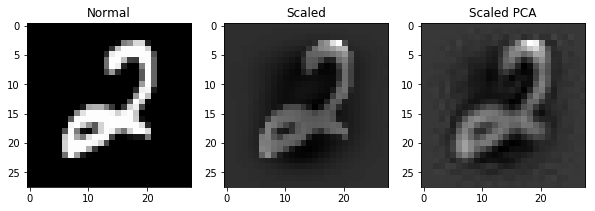

In [0]:
#decompose pca to a readable format 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 8))

ax1.imshow(np.array(x_train)[0].reshape((28,28)),cmap='gray') # Non Scaled
ax1.set_title("Normal")
ax2.imshow(scaled_x_train[0].reshape((28,28)),cmap='gray') # Scaled
ax2.set_title("Scaled")
ax3.imshow(pca.inverse_transform(principle_components[0]).reshape((28,28)),cmap='gray') # PCA
ax3.set_title("Scaled PCA")

